# **DATA PRE-PROCESSING**

In [29]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

# to avoid the encoding errors while reading a CSV file, 'unicode_escape' encoding is used

In [31]:
df.shape

# displays the number of rows and columns in the dataset, i.e. 11251 rows and 15 columns

(11251, 15)

In [32]:
df.head()

# By default this shows the first 5 rows of the file

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [34]:
# drop null columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [35]:
# check for null values
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [36]:
# drop null values

df.dropna(inplace=True)

In [37]:
# checking shape again after dropping null values
df.shape

(11239, 13)

In [38]:
# changing the data type

df['Amount']=df['Amount'].astype('int')

In [12]:
# checking the data type of the Amount column now.
df['Amount'].dtypes

dtype('int64')

In [39]:
# display all the columns

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [40]:
# summary statistics for all numeric columns

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [41]:
# using describe() for specific columns

df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **EXPLORATORY DATA ANALYSIS**

**Gender**

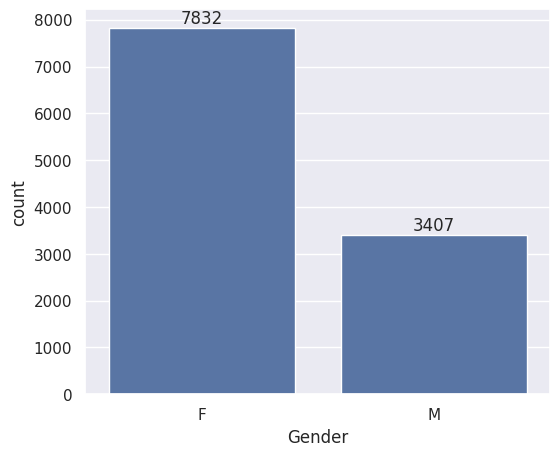

In [42]:
# plotting a bar chart for Gender and its count

ax=sns.countplot(x='Gender',data=df)

# adding the count on top of each bar

for bars in ax.containers:
  ax.bar_label(bars)

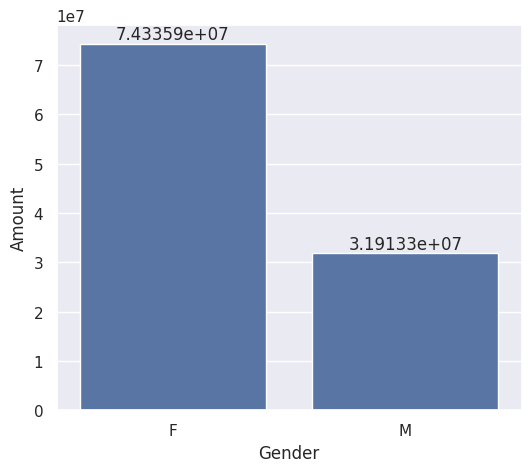

In [43]:
# plotting a bar chart for Gender vs Total amount

sales=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# displaying the total amount on the top of each bar

ax=sns.barplot(x='Gender', y='Amount', data=sales)

for bar in ax.containers:
  ax.bar_label(bar)

From the above graphs, we can see that most of the buyers are women, and their purchasing power is also greater than that of men.

**Age**

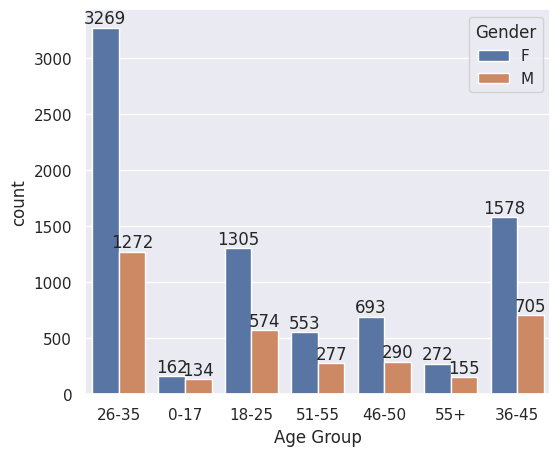

In [44]:
# plotting a bar chart for Age Group and its count by Gender

ax=sns.countplot(x='Age Group', hue='Gender', data=df)

# adding the count on top of each bar

for bars in ax.containers:
  ax.bar_label(bars)

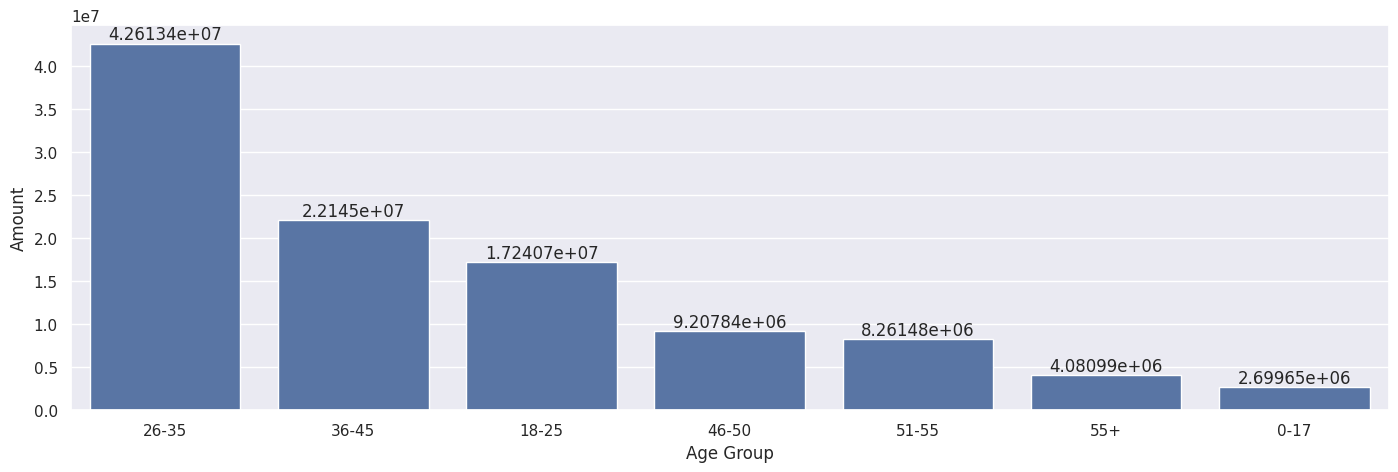

In [48]:
# plotting a bar chart for Age Group vs Total amount

sales=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(17,5)})

# displaying the total amount on the top of each bar

ax=sns.barplot(x='Age Group', y='Amount', data=sales)

for bars in ax.containers:
  ax.bar_label(bars)

From the above graphs, we can see that most of the buyers are females in the 26–35 age group.

**State**

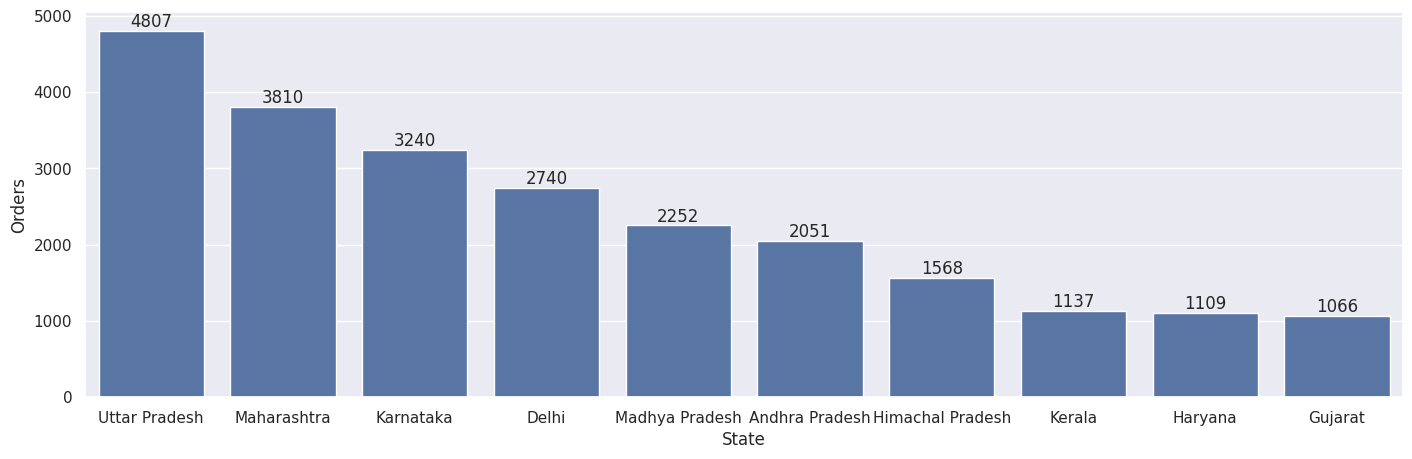

In [49]:
# total number of orders from top 10 states

sales=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)}) # sets the size of the plot

# adding count labels on top of each bar

ax= sns.barplot(x='State', y='Orders', data=sales)

for bars in ax.containers:
  ax.bar_label(bars)


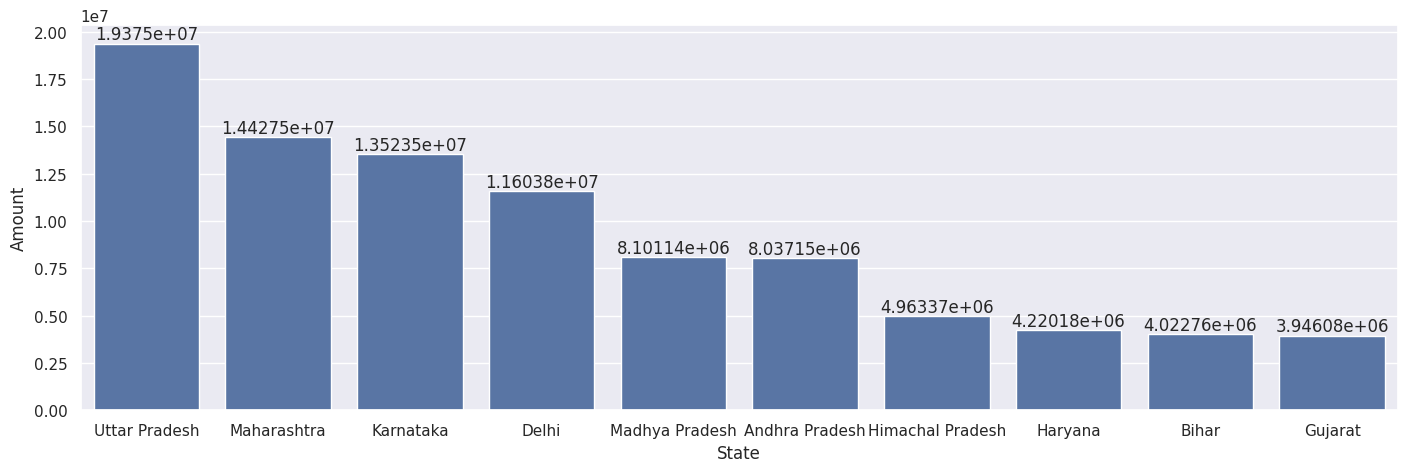

In [50]:
# total amount/sales from top 10 states

sales=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})

# adding count labels on top of each bar

ax=sns.barplot(x='State', y='Amount', data=sales)

for bars in ax.containers:
  ax.bar_label(bars)

From the above graphs, we can see that most of the orders and total sales/amount come from Uttar Pradesh, Maharashtra, and Karnataka, respectively.

**Marital Status**

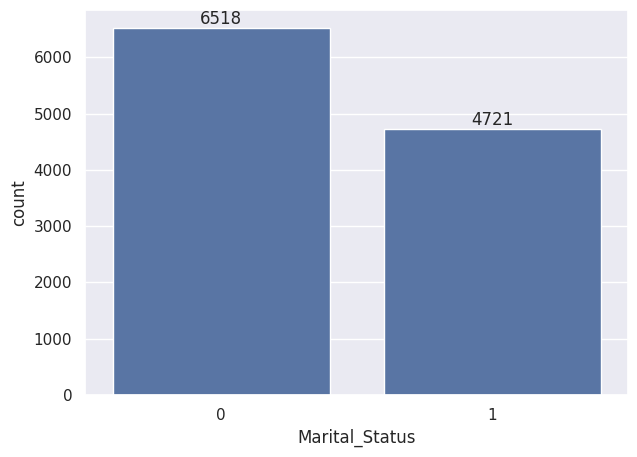

In [51]:
# plotting a bar chart to show the count of customers based on their Marital Status

sns.set(rc={'figure.figsize':(7,5)})

# adding count labels on top of each bar

ax= sns.countplot(x='Marital_Status', data=df)

for bars in ax.containers:
  ax.bar_label(bars)


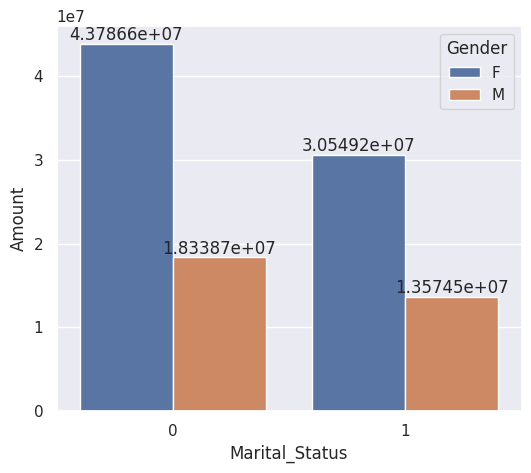

In [55]:
# bar chart showing total purchase amount by Marital Status and Gender

sales= df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})

# displaying the total purchase amount on the top of each bar

ax= sns.barplot(data = sales, x = 'Marital_Status',y= 'Amount', hue='Gender')

for bars in ax.containers:
  ax.bar_label(bars)

From the above graphs, we can see that most of the buyers are married women, and they have higher purchasing power.

**Occupation**

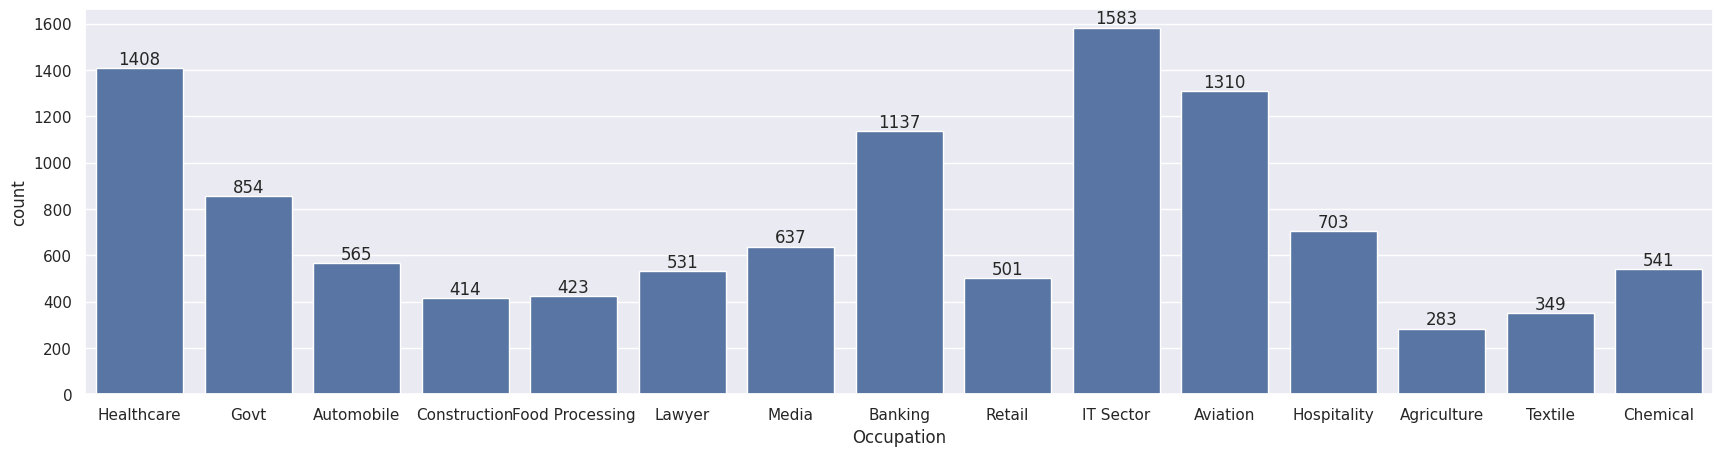

In [57]:
# plotting a bar chart to show the count of customers based on their Occupation

sns.set(rc={'figure.figsize':(21,5)})

# adding count labels on top of each bar

ax=sns.countplot(x='Occupation',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

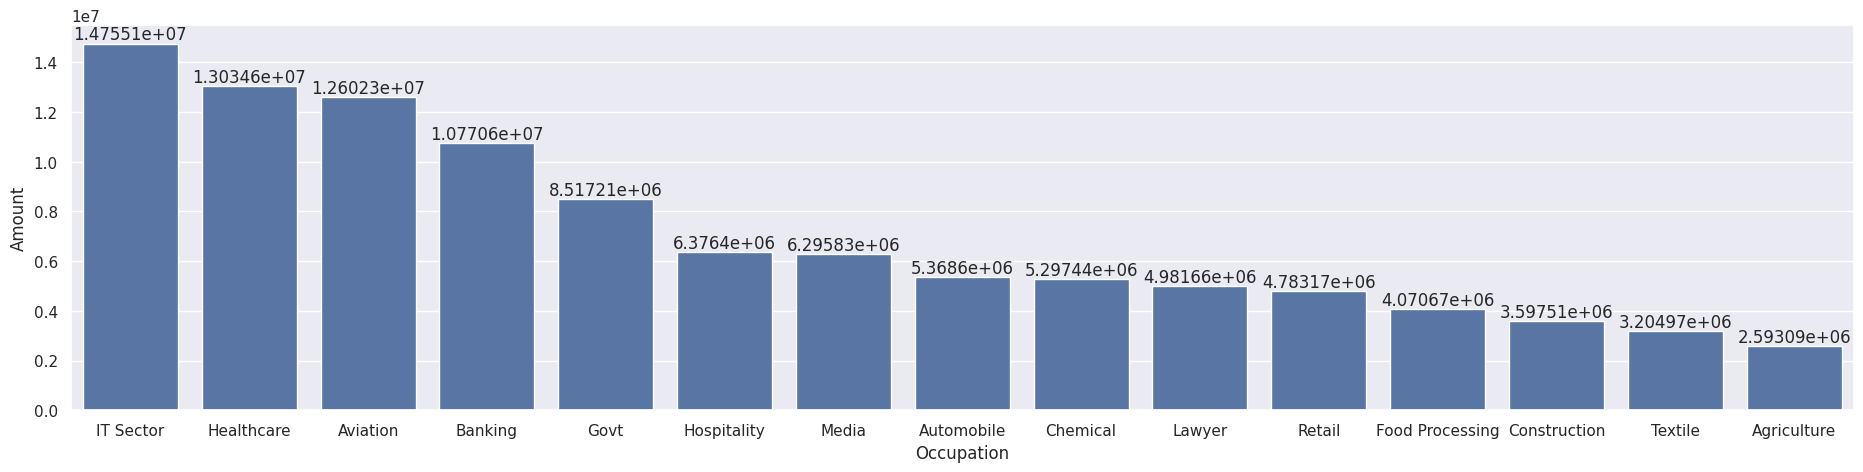

In [60]:
# bar chart showing total purchase amount by Occupation

sales=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(23,5)})

# displaying the total purchase amount on the top of each bar

ax= sns.barplot(x='Occupation', y='Amount', data=sales)

for bars in ax.containers:
  ax.bar_label(bars)


From the above graphs, we can see that most of the buyers work in the IT, Healthcare, and Aviation sectors.

**Product Category**

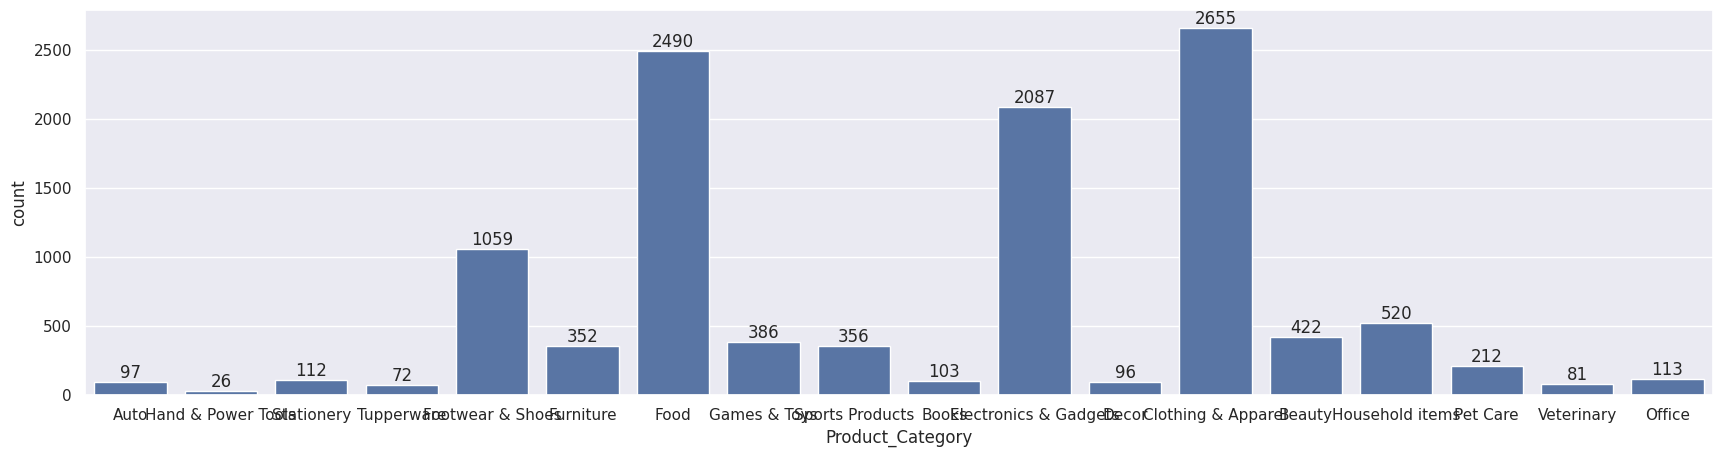

In [62]:
# plotting a bar chart to show the count of customers based on the Product Category

sns.set(rc={'figure.figsize':(21,5)})

# adding count labels on top of each bar
ax=sns.countplot(x='Product_Category',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

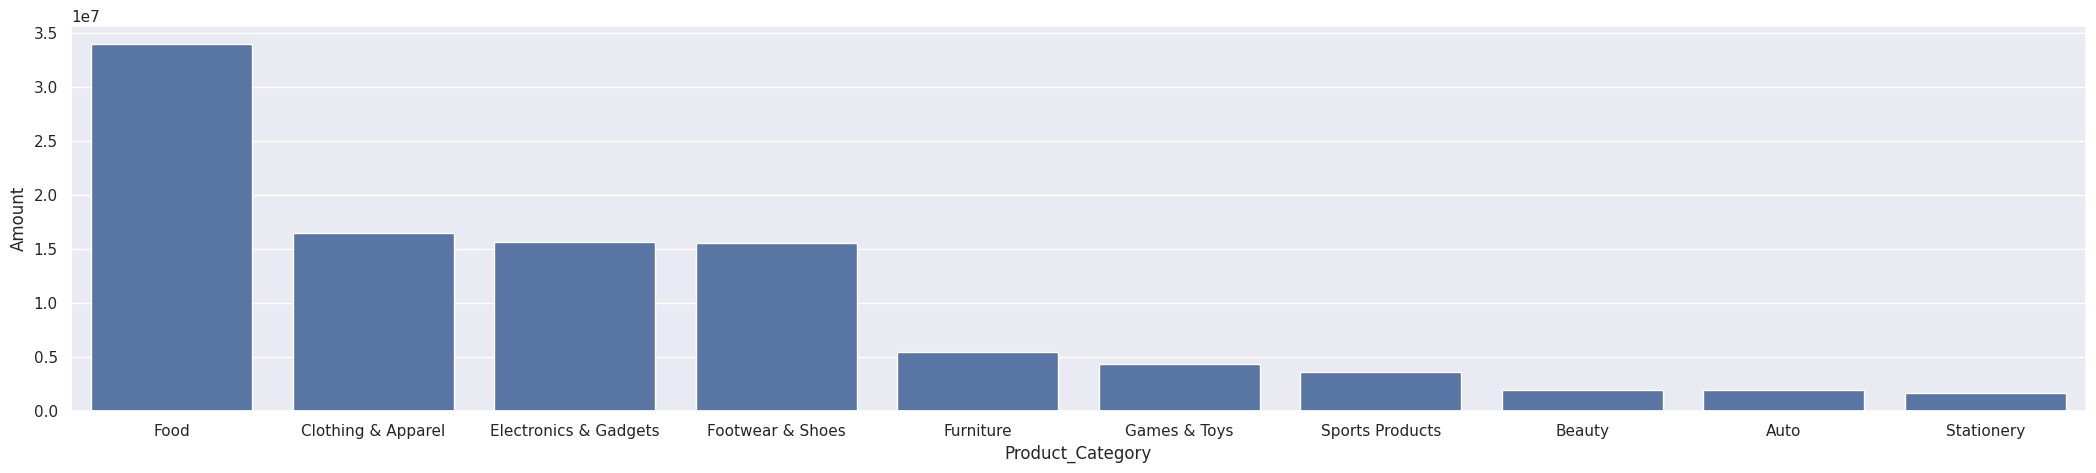

In [69]:
# bar chart showing top 10 Product Categories by total purchase amount
sales=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(26,5)})

sns.barplot(x='Product_Category', y='Amount', data=sales)


From the above graphs, we can see that most of the sold products belong to the Food, Clothing, and Electronics categories.

**Product Id**

<Axes: xlabel='Product_ID', ylabel='Orders'>

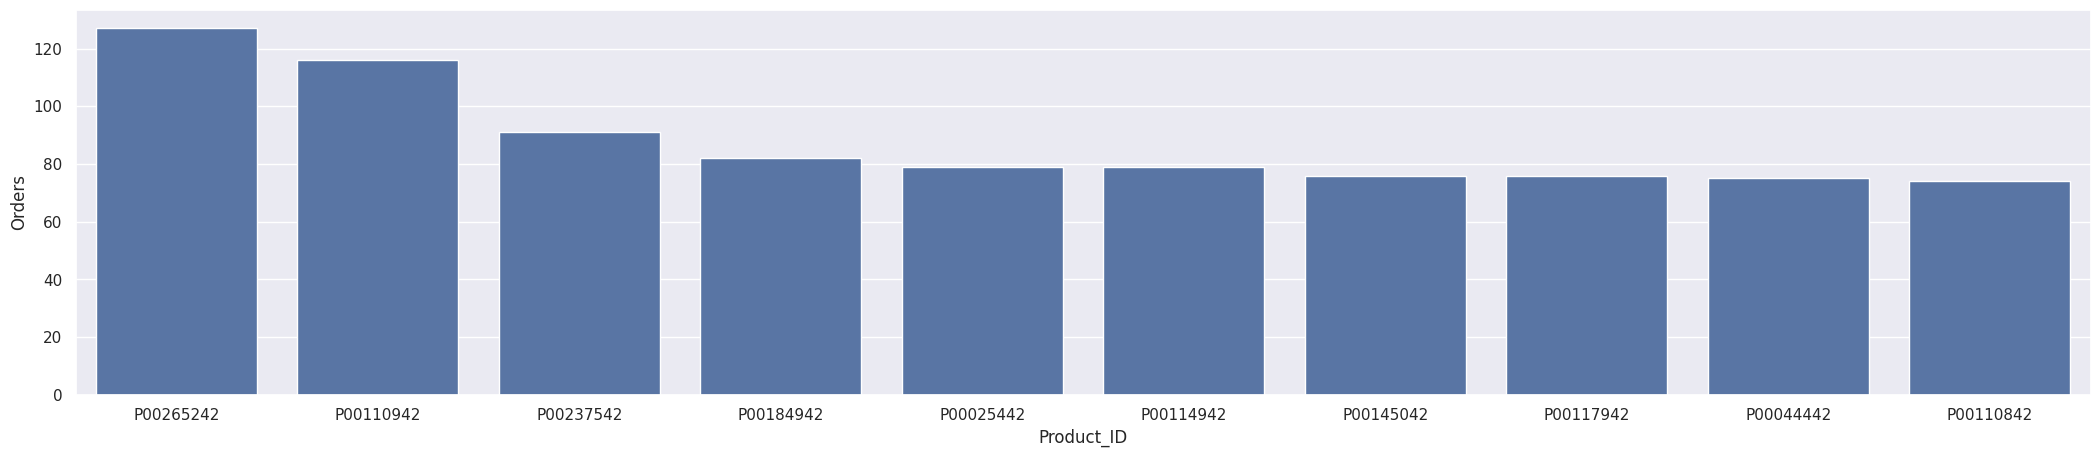

In [70]:
# bar chart showing top 10 Products by number of Orders

sales=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(26,5)})

sns.barplot(x='Product_ID', y='Orders', data=sales)

<Axes: xlabel='Product_ID'>

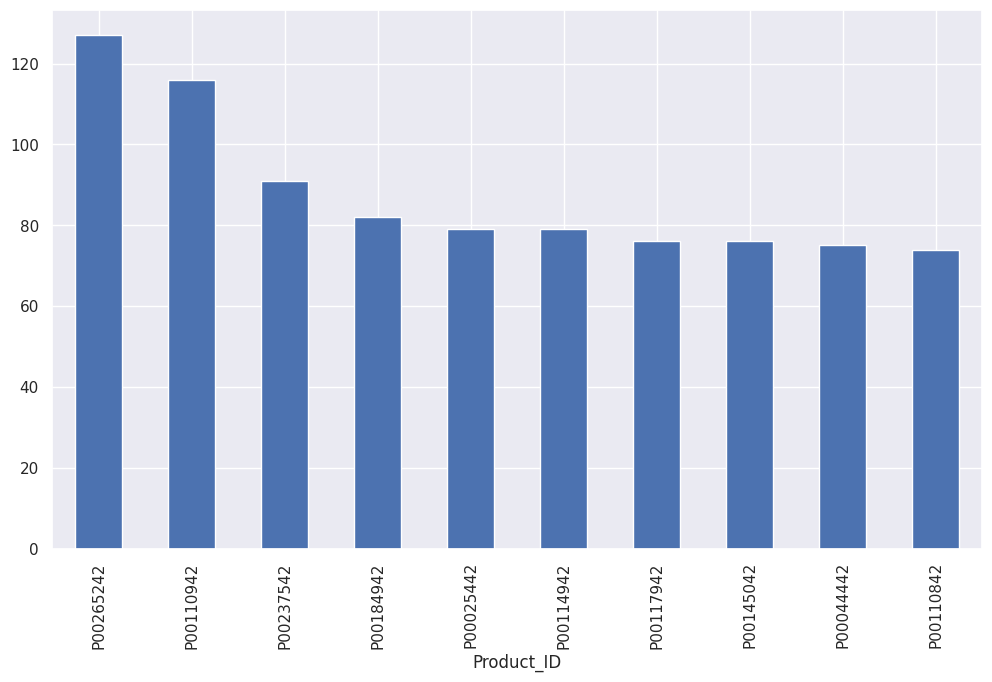

In [71]:
# plotting the top 10 most sold products in a bar chart

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# **Conclusion :**

Married women aged 26–35 from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation, are more likely to purchase products from the Food, Clothing, and Electronics categories.